# visualizzazione differenza velocità media del GP tra 2022 e 2023

In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm

#carico i dati del 2023
ff1.Cache.enable_cache('2023Australia') 
fp23 = ff1.get_session(2023, 'Australia', 'R')
fp_laps23 = fp23.load_laps(with_telemetry=True)
fp23.load()

#carico i dati del 2022
ff1.Cache.enable_cache('2022Australia') 
fp22 = ff1.get_session(2022, 'Australia', 'R')
fp_laps22 = fp22.load_laps(with_telemetry=True)
fp22.load()

category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 0, 'Year')

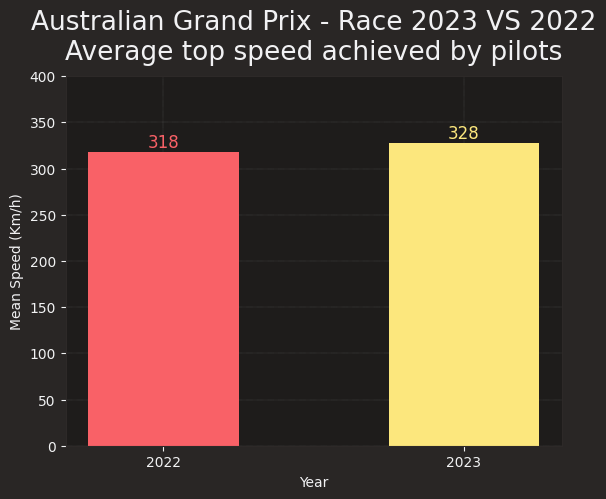

In [3]:
drivers23 = pd.unique(fp23.laps['Driver'])
drivers22 = pd.unique(fp22.laps['Driver'])
#elimino i tempi in cui i piloti erano in giro in o out
fp_laps23 = fp_laps23.loc[(fp_laps23['PitOutTime'].isnull() & fp_laps23['PitInTime'].isnull() & fp_laps23['IsAccurate'] == True)]
fp_laps22 = fp_laps22.loc[(fp_laps22['PitOutTime'].isnull() & fp_laps22['PitInTime'].isnull() & fp_laps22['IsAccurate'] == True)]
max_speed_list23 = list()
max_speed_list22 = list()
for driver in drivers23:
    if not driver == "LEC":
        max_speed_list23.append(max(fp_laps23.pick_driver(driver).get_car_data()['Speed']))


for driver in drivers22:
    if not driver == "SAI":
        max_speed_list22.append(max(fp_laps22.pick_driver(driver).get_car_data()['Speed']))


dict_mean_speed22 = {"2022": int(np.mean(max_speed_list22))}
dict_mean_speed23 = {"2023": int(np.mean(max_speed_list23))}
ff1.plotting.setup_mpl()
plt.bar_label(plt.bar(list(dict_mean_speed22.keys()),list(dict_mean_speed22.values()), color = "#F96167", width=0.5), fontsize = 12, color = '#F96167')
plt.bar_label(plt.bar(list(dict_mean_speed23.keys()),list(dict_mean_speed23.values()), color = "#FCE77D", width=0.5), fontsize = 12, color = '#FCE77D')
plt.title(f"{fp23.event.EventName} - {fp23.name} {fp23.event.year} VS {fp22.event.year}\nAverage top speed achieved by pilots")
plt.grid(color = 'grey', linestyle = ':', linewidth = 0.3)
ax = plt.gca()
ax.set_ylim([0, 400])
plt.ylabel("Mean Speed (Km/h)")
plt.xlabel("Year")